## Decision Trees

[YouTube link](https://www.youtube.com/watch?v=RrVYO6Td9Js&t=240s)



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./../data/telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


### Binary CLassification Problem

We have 19 features

We want to build a DT for this

### Slight Preprocessing



In [4]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [5]:
df['Churn'] = df['Churn'].astype('int')

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


State is a categorical var. out of the box it is not handled by learning algorithms. For now we just drop it

In [7]:
states = df.pop('State')

In [8]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### All Features are now numeric

#### Now we split the DataFrame into a matrix X and vector Y which will form our training set


In [9]:
X, y = df.drop('Churn', axis=1), df['Churn']

In [10]:
X.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [13]:
X.shape, y.shape

((3333, 18), (3333,))

### Split the data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)

- Random state can be any no
- used for shuffling the data
- But if we execute with same random state, results will be same
- seed for pesudo random no generator

In [14]:
print (X_train.shape, X_holdout.shape) 

(2333, 18) (1000, 18)


### Good workflow for splitting dataset

![](./../img/diag3.png)

- We have split out data into train (70%) and holdout (30%)

- We do CV in 70% of our data (train set)

- With CV we assess accuracy and do hyperparameter tuning

- We build a nice model using 70% data

- Even while using CV on 70% of the data we might overfit. That is why we leave 30% of data as holdout for final check

- This gives us a good intuition how our model will perform


### Building a DT



In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
# initial tree

# crierion is gini by default. it is similar to entorpy but faster as it does not have to compute log

# max_depth: by default None. So tree will grow until the end

# min_samples_leaf: by default 1

# these are the most imp params that we will tune via CV


tree = DecisionTreeClassifier(random_state=17)

#### Fit-Predict

In [17]:
# fit the model

tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

#### Check accuracy on holdout data

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
pred_holdout = tree.predict(X_holdout)

In [20]:
pred_holdout.shape == y_holdout.shape

True

In [21]:
accuracy_score(y_holdout, pred_holdout)

0.921

This tree has very high depth. It is built till each leaf is pure

### We have got 92% accuracy - Is it any good

First we can check with the stupidest logic

We can simply check proportion of target variable

In [22]:
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: Churn, dtype: float64

If we simply predict y = 0, accuracy will be 85.5%

92% is better.. But maybe we can do better

### Cross Validation

In [23]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

What is GridSearchCV

- CV is Cross validation

- Grid Search is searching ur hyperparameters in some grid

Say we have to tune 2 hyperparams - max_depth and min_samples_leaf

What GridSearch does is it performs CV for each combination of the 2 hyperparams and we pick a combination that performs best

![](./../img/diag5.png)

A much more efficient method is to use Randomized Search

Bayesian Theory is also applied to fing efficient hyperparams, but randomized serach generally works quite well

With DT we can allow to use GridSearch

StratifiedKFold is for doing CV

In [24]:
import numpy as np

In [25]:
np.arange(2, 10)

array([2, 3, 4, 5, 6, 7, 8, 9])

In [26]:
# min_samples_leaf = 2 means u will have to build ur tree until there are 2 samples in each of ur leaf
# low values corr to deeper trees

params = {
    'max_depth': np.arange(2, 11),
    'min_samples_leaf': np.arange(2,11)
}

In [27]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [28]:
# argumets

# estimator:  model
# param_grid : hyperparam names
# scoring: by default it is accuracy
# n_jobs: to parallelize, -1 will tell it to use all available cores
# cv: Cross validation
# verbose: 1 means it will print intermediate info

best_tree = GridSearchCV(estimator=tree, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

# best tree because it contains the best hyperparam setting for our tree

Fit the data

In [29]:
best_tree.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    2.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

What is does here is checks 9 (2-10) values of max_depth and for each of those it checks 9 vals of min_samples_leaf.

It does 5 fold CV for each setting

So it trains a DT 9x9x5 = 405 times


#### Best Hyper Parameters

In [30]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 2}

Here we tuned for hyperparams in the range 2-10 and got the best ones

For max_deph we see that the best is 6 which is in the middle of our range

But for min_samples_leaf we see that the best is 2, which is the min vaalue for which we have tested

Maybe 1 is better

So we check agian for 1

It turns out that it will not make a difference and still 2 is the best

**If we get a best hyperparam value in the border of our range, it is worthwile to check again**

Best model:

In [31]:
best_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

### Cross Validation Assessment of model quality

In [32]:
best_tree.best_score_

0.9417059579939991

- This is the bet score via CV

- So we did CV 405 times

- The best avg CV accuracy was this

- This is a bit better than 92%


### Holdout Assessment of model quality



In [33]:
pred_holdout = best_tree.predict(X_holdout)

In [34]:
accuracy_score(y_holdout, pred_holdout)

0.947

**Our holdout (test accuracy) has indeed increased**

### Implementing CV on the original tree

In [36]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [37]:
from sklearn.model_selection import cross_val_score

In [39]:
# scoring: accuracy by default

validation_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
print (validation_scores)

print (np.mean(validation_scores))

[0.89507495 0.91862955 0.91220557 0.90772532 0.9055794 ]
0.9078429570539743


We get 5 values of accuracies because it was 5 fold cv

#### Now we tune max_depth using the workflow discussed earlier

In [43]:
from tqdm import tqdm_notebook

In [47]:
cv_accuracies_by_depth, holdout_accuracies_by_depth = [],[]

max_depth_values = np.arange(2,11)

# for each value of max_depth
for depth in tqdm_notebook(max_depth_values):
    tree = DecisionTreeClassifier(random_state=17, max_depth=depth)
    
    # perform cross val
    validation_scores = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=skf)
    cv_accuracies_by_depth.append(np.mean(validation_scores))
    
    # fit the model of current depth on training data
    tree.fit(X_train, y_train)
    
    # asseess the model with holdout set
    current_holdout_pred = tree.predict(X_holdout)
    holdout_accuracies_by_depth.append(accuracy_score(y_holdout, current_holdout_pred))
    
    

A Jupyter Widget

- Now we have avg cv accuracies and holdout accuracies
- We want to plot it now

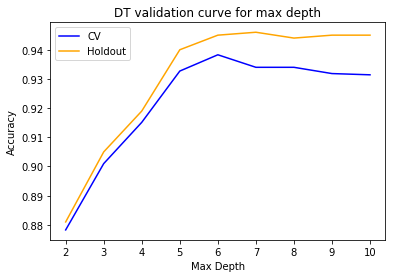

In [51]:
plt.plot(max_depth_values, cv_accuracies_by_depth, label = "CV", c='blue')
plt.plot(max_depth_values, holdout_accuracies_by_depth, label = "Holdout", c='orange')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('DT validation curve for max depth');

- max depth = 6 is a very good value. This we obtained by grid seach

### Visualizing the tree

- Install Graphviz

- Install pydot

In [53]:
X.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [52]:
from sklearn.tree import export_graphviz

In [54]:
export_graphviz(decision_tree=best_tree.best_estimator_, out_file='tree.dot', filled=True, feature_names=X.columns)

In [55]:
!ls *.dot

tree.dot


Now that .dot file has been generated open it and copy the code 

Paste ut in [this](http://www.webgraphviz.com/) link or [this](http://sandbox.kidstrythisathome.com/erdos/) link to generate the image

![](https://chart.googleapis.com/chart?chl=digraph+Tree+%7B%0D%0Anode+%5Bshape%3Dbox%2C+style%3D%22filled%22%2C+color%3D%22black%22%5D+%3B%0D%0A0+%5Blabel%3D%22Total+day+minutes+%3C%3D+264.45%5Cngini+%3D+0.255%5Cnsamples+%3D+2333%5Cnvalue+%3D+%5B1983%2C+350%5D%22%2C+fillcolor%3D%22%23e58139d2%22%5D+%3B%0D%0A1+%5Blabel%3D%22Customer+service+calls+%3C%3D+3.5%5Cngini+%3D+0.206%5Cnsamples+%3D+2182%5Cnvalue+%3D+%5B1927%2C+255%5D%22%2C+fillcolor%3D%22%23e58139dd%22%5D+%3B%0D%0A0+-%3E+1+%5Blabeldistance%3D2.5%2C+labelangle%3D45%2C+headlabel%3D%22True%22%5D+%3B%0D%0A2+%5Blabel%3D%22International+plan+%3C%3D+0.5%5Cngini+%3D+0.149%5Cnsamples+%3D+2004%5Cnvalue+%3D+%5B1842%2C+162%5D%22%2C+fillcolor%3D%22%23e58139e9%22%5D+%3B%0D%0A1+-%3E+2+%3B%0D%0A3+%5Blabel%3D%22Total+day+charge+%3C%3D+38.185%5Cngini+%3D+0.096%5Cnsamples+%3D+1828%5Cnvalue+%3D+%5B1736%2C+92%5D%22%2C+fillcolor%3D%22%23e58139f1%22%5D+%3B%0D%0A2+-%3E+3+%3B%0D%0A4+%5Blabel%3D%22Account+length+%3C%3D+224.5%5Cngini+%3D+0.056%5Cnsamples+%3D+1570%5Cnvalue+%3D+%5B1525%2C+45%5D%22%2C+fillcolor%3D%22%23e58139f7%22%5D+%3B%0D%0A3+-%3E+4+%3B%0D%0A5+%5Blabel%3D%22Total+eve+charge+%3C%3D+27.965%5Cngini+%3D+0.055%5Cnsamples+%3D+1568%5Cnvalue+%3D+%5B1524%2C+44%5D%22%2C+fillcolor%3D%22%23e58139f8%22%5D+%3B%0D%0A4+-%3E+5+%3B%0D%0A6+%5Blabel%3D%22gini+%3D+0.052%5Cnsamples+%3D+1560%5Cnvalue+%3D+%5B1518%2C+42%5D%22%2C+fillcolor%3D%22%23e58139f8%22%5D+%3B%0D%0A5+-%3E+6+%3B%0D%0A7+%5Blabel%3D%22gini+%3D+0.375%5Cnsamples+%3D+8%5Cnvalue+%3D+%5B6%2C+2%5D%22%2C+fillcolor%3D%22%23e58139aa%22%5D+%3B%0D%0A5+-%3E+7+%3B%0D%0A8+%5Blabel%3D%22gini+%3D+0.5%5Cnsamples+%3D+2%5Cnvalue+%3D+%5B1%2C+1%5D%22%2C+fillcolor%3D%22%23e5813900%22%5D+%3B%0D%0A4+-%3E+8+%3B%0D%0A9+%5Blabel%3D%22Total+eve+charge+%3C%3D+22.67%5Cngini+%3D+0.298%5Cnsamples+%3D+258%5Cnvalue+%3D+%5B211%2C+47%5D%22%2C+fillcolor%3D%22%23e58139c6%22%5D+%3B%0D%0A3+-%3E+9+%3B%0D%0A10+%5Blabel%3D%22Total+eve+minutes+%3C%3D+242.35%5Cngini+%3D+0.188%5Cnsamples+%3D+229%5Cnvalue+%3D+%5B205%2C+24%5D%22%2C+fillcolor%3D%22%23e58139e1%22%5D+%3B%0D%0A9+-%3E+10+%3B%0D%0A11+%5Blabel%3D%22gini+%3D+0.123%5Cnsamples+%3D+198%5Cnvalue+%3D+%5B185%2C+13%5D%22%2C+fillcolor%3D%22%23e58139ed%22%5D+%3B%0D%0A10+-%3E+11+%3B%0D%0A12+%5Blabel%3D%22gini+%3D+0.458%5Cnsamples+%3D+31%5Cnvalue+%3D+%5B20%2C+11%5D%22%2C+fillcolor%3D%22%23e5813973%22%5D+%3B%0D%0A10+-%3E+12+%3B%0D%0A13+%5Blabel%3D%22Voice+mail+plan+%3C%3D+0.5%5Cngini+%3D+0.328%5Cnsamples+%3D+29%5Cnvalue+%3D+%5B6%2C+23%5D%22%2C+fillcolor%3D%22%23399de5bc%22%5D+%3B%0D%0A9+-%3E+13+%3B%0D%0A14+%5Blabel%3D%22gini+%3D+0.08%5Cnsamples+%3D+24%5Cnvalue+%3D+%5B1%2C+23%5D%22%2C+fillcolor%3D%22%23399de5f4%22%5D+%3B%0D%0A13+-%3E+14+%3B%0D%0A15+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+5%5Cnvalue+%3D+%5B5%2C+0%5D%22%2C+fillcolor%3D%22%23e58139ff%22%5D+%3B%0D%0A13+-%3E+15+%3B%0D%0A16+%5Blabel%3D%22Total+intl+calls+%3C%3D+2.5%5Cngini+%3D+0.479%5Cnsamples+%3D+176%5Cnvalue+%3D+%5B106%2C+70%5D%22%2C+fillcolor%3D%22%23e5813957%22%5D+%3B%0D%0A2+-%3E+16+%3B%0D%0A17+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+39%5Cnvalue+%3D+%5B0%2C+39%5D%22%2C+fillcolor%3D%22%23399de5ff%22%5D+%3B%0D%0A16+-%3E+17+%3B%0D%0A18+%5Blabel%3D%22Total+intl+minutes+%3C%3D+13.1%5Cngini+%3D+0.35%5Cnsamples+%3D+137%5Cnvalue+%3D+%5B106%2C+31%5D%22%2C+fillcolor%3D%22%23e58139b4%22%5D+%3B%0D%0A16+-%3E+18+%3B%0D%0A19+%5Blabel%3D%22Total+eve+minutes+%3C%3D+324.85%5Cngini+%3D+0.086%5Cnsamples+%3D+111%5Cnvalue+%3D+%5B106%2C+5%5D%22%2C+fillcolor%3D%22%23e58139f3%22%5D+%3B%0D%0A18+-%3E+19+%3B%0D%0A20+%5Blabel%3D%22gini+%3D+0.054%5Cnsamples+%3D+108%5Cnvalue+%3D+%5B105%2C+3%5D%22%2C+fillcolor%3D%22%23e58139f8%22%5D+%3B%0D%0A19+-%3E+20+%3B%0D%0A21+%5Blabel%3D%22gini+%3D+0.444%5Cnsamples+%3D+3%5Cnvalue+%3D+%5B1%2C+2%5D%22%2C+fillcolor%3D%22%23399de57f%22%5D+%3B%0D%0A19+-%3E+21+%3B%0D%0A22+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+26%5Cnvalue+%3D+%5B0%2C+26%5D%22%2C+fillcolor%3D%22%23399de5ff%22%5D+%3B%0D%0A18+-%3E+22+%3B%0D%0A23+%5Blabel%3D%22Total+day+minutes+%3C%3D+159.9%5Cngini+%3D+0.499%5Cnsamples+%3D+178%5Cnvalue+%3D+%5B85%2C+93%5D%22%2C+fillcolor%3D%22%23399de516%22%5D+%3B%0D%0A1+-%3E+23+%3B%0D%0A24+%5Blabel%3D%22Total+eve+charge+%3C%3D+22.57%5Cngini+%3D+0.209%5Cnsamples+%3D+76%5Cnvalue+%3D+%5B9%2C+67%5D%22%2C+fillcolor%3D%22%23399de5dd%22%5D+%3B%0D%0A23+-%3E+24+%3B%0D%0A25+%5Blabel%3D%22Total+day+charge+%3C%3D+23.565%5Cngini+%3D+0.153%5Cnsamples+%3D+72%5Cnvalue+%3D+%5B6%2C+66%5D%22%2C+fillcolor%3D%22%23399de5e8%22%5D+%3B%0D%0A24+-%3E+25+%3B%0D%0A26+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+41%5Cnvalue+%3D+%5B0%2C+41%5D%22%2C+fillcolor%3D%22%23399de5ff%22%5D+%3B%0D%0A25+-%3E+26+%3B%0D%0A27+%5Blabel%3D%22Total+eve+minutes+%3C%3D+232.05%5Cngini+%3D+0.312%5Cnsamples+%3D+31%5Cnvalue+%3D+%5B6%2C+25%5D%22%2C+fillcolor%3D%22%23399de5c2%22%5D+%3B%0D%0A25+-%3E+27+%3B%0D%0A28+%5Blabel%3D%22gini+%3D+0.191%5Cnsamples+%3D+28%5Cnvalue+%3D+%5B3%2C+25%5D%22%2C+fillcolor%3D%22%23399de5e0%22%5D+%3B%0D%0A27+-%3E+28+%3B%0D%0A29+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+3%5Cnvalue+%3D+%5B3%2C+0%5D%22%2C+fillcolor%3D%22%23e58139ff%22%5D+%3B%0D%0A27+-%3E+29+%3B%0D%0A30+%5Blabel%3D%22Voice+mail+plan+%3C%3D+0.5%5Cngini+%3D+0.375%5Cnsamples+%3D+4%5Cnvalue+%3D+%5B3%2C+1%5D%22%2C+fillcolor%3D%22%23e58139aa%22%5D+%3B%0D%0A24+-%3E+30+%3B%0D%0A31+%5Blabel%3D%22gini+%3D+0.5%5Cnsamples+%3D+2%5Cnvalue+%3D+%5B1%2C+1%5D%22%2C+fillcolor%3D%22%23e5813900%22%5D+%3B%0D%0A30+-%3E+31+%3B%0D%0A32+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+2%5Cnvalue+%3D+%5B2%2C+0%5D%22%2C+fillcolor%3D%22%23e58139ff%22%5D+%3B%0D%0A30+-%3E+32+%3B%0D%0A33+%5Blabel%3D%22Total+eve+minutes+%3C%3D+155.5%5Cngini+%3D+0.38%5Cnsamples+%3D+102%5Cnvalue+%3D+%5B76%2C+26%5D%22%2C+fillcolor%3D%22%23e58139a8%22%5D+%3B%0D%0A23+-%3E+33+%3B%0D%0A34+%5Blabel%3D%22Total+day+charge+%3C%3D+34.36%5Cngini+%3D+0.461%5Cnsamples+%3D+25%5Cnvalue+%3D+%5B9%2C+16%5D%22%2C+fillcolor%3D%22%23399de570%22%5D+%3B%0D%0A33+-%3E+34+%3B%0D%0A35+%5Blabel%3D%22Total+night+charge+%3C%3D+10.58%5Cngini+%3D+0.231%5Cnsamples+%3D+15%5Cnvalue+%3D+%5B2%2C+13%5D%22%2C+fillcolor%3D%22%23399de5d8%22%5D+%3B%0D%0A34+-%3E+35+%3B%0D%0A36+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+11%5Cnvalue+%3D+%5B0%2C+11%5D%22%2C+fillcolor%3D%22%23399de5ff%22%5D+%3B%0D%0A35+-%3E+36+%3B%0D%0A37+%5Blabel%3D%22gini+%3D+0.5%5Cnsamples+%3D+4%5Cnvalue+%3D+%5B2%2C+2%5D%22%2C+fillcolor%3D%22%23e5813900%22%5D+%3B%0D%0A35+-%3E+37+%3B%0D%0A38+%5Blabel%3D%22Total+night+calls+%3C%3D+118.5%5Cngini+%3D+0.42%5Cnsamples+%3D+10%5Cnvalue+%3D+%5B7%2C+3%5D%22%2C+fillcolor%3D%22%23e5813992%22%5D+%3B%0D%0A34+-%3E+38+%3B%0D%0A39+%5Blabel%3D%22gini+%3D+0.219%5Cnsamples+%3D+8%5Cnvalue+%3D+%5B7%2C+1%5D%22%2C+fillcolor%3D%22%23e58139db%22%5D+%3B%0D%0A38+-%3E+39+%3B%0D%0A40+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+2%5Cnvalue+%3D+%5B0%2C+2%5D%22%2C+fillcolor%3D%22%23399de5ff%22%5D+%3B%0D%0A38+-%3E+40+%3B%0D%0A41+%5Blabel%3D%22Total+day+minutes+%3C%3D+173.65%5Cngini+%3D+0.226%5Cnsamples+%3D+77%5Cnvalue+%3D+%5B67%2C+10%5D%22%2C+fillcolor%3D%22%23e58139d9%22%5D+%3B%0D%0A33+-%3E+41+%3B%0D%0A42+%5Blabel%3D%22Total+eve+charge+%3C%3D+17.755%5Cngini+%3D+0.457%5Cnsamples+%3D+17%5Cnvalue+%3D+%5B11%2C+6%5D%22%2C+fillcolor%3D%22%23e5813974%22%5D+%3B%0D%0A41+-%3E+42+%3B%0D%0A43+%5Blabel%3D%22gini+%3D+0.245%5Cnsamples+%3D+7%5Cnvalue+%3D+%5B1%2C+6%5D%22%2C+fillcolor%3D%22%23399de5d4%22%5D+%3B%0D%0A42+-%3E+43+%3B%0D%0A44+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+10%5Cnvalue+%3D+%5B10%2C+0%5D%22%2C+fillcolor%3D%22%23e58139ff%22%5D+%3B%0D%0A42+-%3E+44+%3B%0D%0A45+%5Blabel%3D%22International+plan+%3C%3D+0.5%5Cngini+%3D+0.124%5Cnsamples+%3D+60%5Cnvalue+%3D+%5B56%2C+4%5D%22%2C+fillcolor%3D%22%23e58139ed%22%5D+%3B%0D%0A41+-%3E+45+%3B%0D%0A46+%5Blabel%3D%22gini+%3D+0.038%5Cnsamples+%3D+52%5Cnvalue+%3D+%5B51%2C+1%5D%22%2C+fillcolor%3D%22%23e58139fa%22%5D+%3B%0D%0A45+-%3E+46+%3B%0D%0A47+%5Blabel%3D%22gini+%3D+0.469%5Cnsamples+%3D+8%5Cnvalue+%3D+%5B5%2C+3%5D%22%2C+fillcolor%3D%22%23e5813966%22%5D+%3B%0D%0A45+-%3E+47+%3B%0D%0A48+%5Blabel%3D%22Number+vmail+messages+%3C%3D+6.5%5Cngini+%3D+0.467%5Cnsamples+%3D+151%5Cnvalue+%3D+%5B56%2C+95%5D%22%2C+fillcolor%3D%22%23399de569%22%5D+%3B%0D%0A0+-%3E+48+%5Blabeldistance%3D2.5%2C+labelangle%3D-45%2C+headlabel%3D%22False%22%5D+%3B%0D%0A49+%5Blabel%3D%22Total+eve+charge+%3C%3D+15.96%5Cngini+%3D+0.335%5Cnsamples+%3D+113%5Cnvalue+%3D+%5B24%2C+89%5D%22%2C+fillcolor%3D%22%23399de5ba%22%5D+%3B%0D%0A48+-%3E+49+%3B%0D%0A50+%5Blabel%3D%22Total+day+charge+%3C%3D+51.415%5Cngini+%3D+0.495%5Cnsamples+%3D+40%5Cnvalue+%3D+%5B22%2C+18%5D%22%2C+fillcolor%3D%22%23e581392e%22%5D+%3B%0D%0A49+-%3E+50+%3B%0D%0A51+%5Blabel%3D%22Total+night+minutes+%3C%3D+213.25%5Cngini+%3D+0.43%5Cnsamples+%3D+32%5Cnvalue+%3D+%5B22%2C+10%5D%22%2C+fillcolor%3D%22%23e581398b%22%5D+%3B%0D%0A50+-%3E+51+%3B%0D%0A52+%5Blabel%3D%22Account+length+%3C%3D+164.5%5Cngini+%3D+0.1%5Cnsamples+%3D+19%5Cnvalue+%3D+%5B18%2C+1%5D%22%2C+fillcolor%3D%22%23e58139f1%22%5D+%3B%0D%0A51+-%3E+52+%3B%0D%0A53+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+17%5Cnvalue+%3D+%5B17%2C+0%5D%22%2C+fillcolor%3D%22%23e58139ff%22%5D+%3B%0D%0A52+-%3E+53+%3B%0D%0A54+%5Blabel%3D%22gini+%3D+0.5%5Cnsamples+%3D+2%5Cnvalue+%3D+%5B1%2C+1%5D%22%2C+fillcolor%3D%22%23e5813900%22%5D+%3B%0D%0A52+-%3E+54+%3B%0D%0A55+%5Blabel%3D%22Total+eve+charge+%3C%3D+13.205%5Cngini+%3D+0.426%5Cnsamples+%3D+13%5Cnvalue+%3D+%5B4%2C+9%5D%22%2C+fillcolor%3D%22%23399de58e%22%5D+%3B%0D%0A51+-%3E+55+%3B%0D%0A56+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+4%5Cnvalue+%3D+%5B4%2C+0%5D%22%2C+fillcolor%3D%22%23e58139ff%22%5D+%3B%0D%0A55+-%3E+56+%3B%0D%0A57+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+9%5Cnvalue+%3D+%5B0%2C+9%5D%22%2C+fillcolor%3D%22%23399de5ff%22%5D+%3B%0D%0A55+-%3E+57+%3B%0D%0A58+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+8%5Cnvalue+%3D+%5B0%2C+8%5D%22%2C+fillcolor%3D%22%23399de5ff%22%5D+%3B%0D%0A50+-%3E+58+%3B%0D%0A59+%5Blabel%3D%22Total+night+minutes+%3C%3D+131.1%5Cngini+%3D+0.053%5Cnsamples+%3D+73%5Cnvalue+%3D+%5B2%2C+71%5D%22%2C+fillcolor%3D%22%23399de5f8%22%5D+%3B%0D%0A49+-%3E+59+%3B%0D%0A60+%5Blabel%3D%22gini+%3D+0.444%5Cnsamples+%3D+3%5Cnvalue+%3D+%5B2%2C+1%5D%22%2C+fillcolor%3D%22%23e581397f%22%5D+%3B%0D%0A59+-%3E+60+%3B%0D%0A61+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+70%5Cnvalue+%3D+%5B0%2C+70%5D%22%2C+fillcolor%3D%22%23399de5ff%22%5D+%3B%0D%0A59+-%3E+61+%3B%0D%0A62+%5Blabel%3D%22International+plan+%3C%3D+0.5%5Cngini+%3D+0.266%5Cnsamples+%3D+38%5Cnvalue+%3D+%5B32%2C+6%5D%22%2C+fillcolor%3D%22%23e58139cf%22%5D+%3B%0D%0A48+-%3E+62+%3B%0D%0A63+%5Blabel%3D%22Total+day+charge+%3C%3D+53.5%5Cngini+%3D+0.062%5Cnsamples+%3D+31%5Cnvalue+%3D+%5B30%2C+1%5D%22%2C+fillcolor%3D%22%23e58139f6%22%5D+%3B%0D%0A62+-%3E+63+%3B%0D%0A64+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+29%5Cnvalue+%3D+%5B29%2C+0%5D%22%2C+fillcolor%3D%22%23e58139ff%22%5D+%3B%0D%0A63+-%3E+64+%3B%0D%0A65+%5Blabel%3D%22gini+%3D+0.5%5Cnsamples+%3D+2%5Cnvalue+%3D+%5B1%2C+1%5D%22%2C+fillcolor%3D%22%23e5813900%22%5D+%3B%0D%0A63+-%3E+65+%3B%0D%0A66+%5Blabel%3D%22Total+eve+charge+%3C%3D+17.79%5Cngini+%3D+0.408%5Cnsamples+%3D+7%5Cnvalue+%3D+%5B2%2C+5%5D%22%2C+fillcolor%3D%22%23399de599%22%5D+%3B%0D%0A62+-%3E+66+%3B%0D%0A67+%5Blabel%3D%22gini+%3D+0.444%5Cnsamples+%3D+3%5Cnvalue+%3D+%5B2%2C+1%5D%22%2C+fillcolor%3D%22%23e581397f%22%5D+%3B%0D%0A66+-%3E+67+%3B%0D%0A68+%5Blabel%3D%22gini+%3D+0.0%5Cnsamples+%3D+4%5Cnvalue+%3D+%5B0%2C+4%5D%22%2C+fillcolor%3D%22%23399de5ff%22%5D+%3B%0D%0A66+-%3E+68+%3B%0D%0A%7D&cht=gv)

### For visualizing we just fit a tree to a max_depth of 3



In [56]:
tree_depth3 = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, y_train)

In [57]:
export_graphviz(decision_tree=tree_depth3, out_file='tree_depth3.dot', filled=True, feature_names=X.columns)

In [61]:
from io import StringIO
import pydotplus
from ipywidgets import Image

In [62]:
dot_data = StringIO()

# instead of exporting tree to .dot file we export it to a StringIO obj
export_graphviz(decision_tree=tree_depth3, out_file=dot_data, filled=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value = graph.create_png())

A Jupyter Widget

- First feature is Total day mins

- We compare it to some threshold

- Tree uses gini criteria. 0 is perfect, something close to 1 is worse

- Initially we had 2333 samples

- Distribution (1983 loyal, 350 churn)

- orange: more loyal customers, blue: more churn customers

- we restricted depth, so they are not pure. So there is a mix of good and bad clients

- For pred, if we follow the tree and end up, say in the 6th leaf from the left, we predict that client is bad 

- Intuitively, client uses the ph a lot (>264), does not have Voice mail plan, eve charge are pretty high (>16) they tend to churn

- For this job DTs generally works v well ~94%. If we use RF the inc is not going to be that high, say around 96%

- We have to rely on our business knowledge to understand if the gain in 2% is worth it or not

- If there are lots of features DTs do not work v well. Linear models will be better
